In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sl
import joblib
import numpy as np
import ipywidgets as widgets

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from IPython.display import display

fajl = "housing.csv"

oszlopok = [
    "CRIM",  # bűnözési ráta
    "ZN",    # nagyobb lakótelkek százaléka
    "INDUS", # nem lakóterületek aránya
    "CHAS",  # Charles-folyó melletti ingatlan (0 vagy 1)
    "NOX",   # légszennyezési koncentráció
    "RM",    # szobák átlagos száma
    "AGE",   # régebbi épületek aránya (%)
    "DIS",   # távolság a foglalkoztatási központoktól
    "RAD",   # hozzáférési index autópályákhoz
    "TAX",   # ingatlanadó
    "PTRATIO", # tanuló/tanár arány
    "B",     # Black (faji jelző érték)
    "LSTAT", # alacsony státuszú népesség aránya (%)
    "MEDV"   # célváltozó: ház árának mediánja
]

adatok = pd.read_csv(fajl, delim_whitespace=True, header = None)
adatok.columns = oszlopok
print(adatok.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


E:\AppData\Local\Temp\ipykernel_4244\1749510643.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  adatok = pd.read_csv(fajl, delim_whitespace=True, header = None)


Prediktorok: független változók, amelyek előrejelzik az ingatlan árát
Cél: Ezt a "választ" tanulja meg előrejelezni a gép

In [22]:
cel = 'MEDV'
prediktorok = adatok.drop(columns=[cel])
cel = adatok[cel]

Prediktorok eloszlásának és korrelációnak vizsgálata
Figyeli, hogy a jellemzők közötti kapcsolat milyen hatással vannak az ingatlan árakra

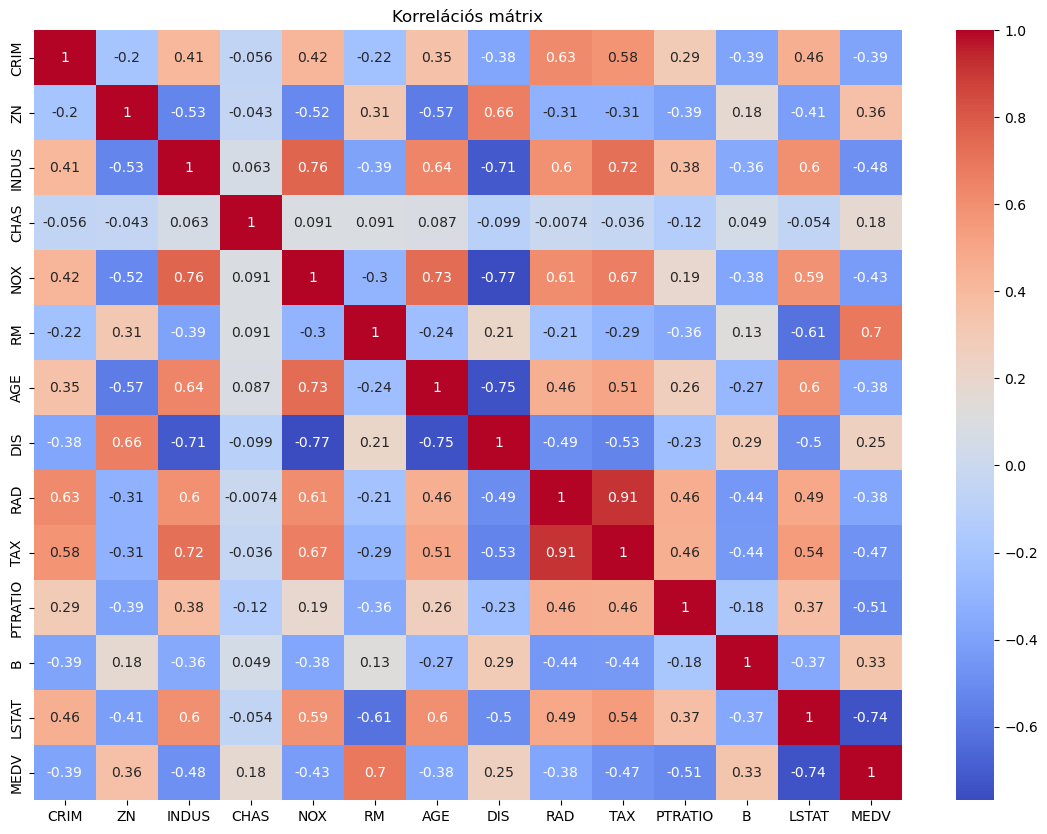

In [23]:
plt.figure(figsize=(14, 10))
sns.heatmap(adatok.corr(), annot=True, cmap="coolwarm")
plt.title("Korrelációs mátrix")
plt.show()

Normalizálás
Azonos skálán mozogjanak az értékek
Tanító- és teszthalmaz szétosztása

In [24]:
normalizalo = StandardScaler()
prediktorok_normalizalt = normalizalo.fit_transform(prediktorok)

X_train, X_test, y_train, y_test = train_test_split(
    prediktorok_normalizalt, cel, test_size=0.2, random_state=42
)

Lineáris regressziós modell betanítása
Előrejelzés és teljesítménymérés

In [ ]:
# Lineáris regresszió
modell = LinearRegression()
modell.fit(X_train, y_train)

y_pred = modell.predict(X_test)

#kiértékelés
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error (MAE): modell pontatlansága (kisebb: jobb)
r2 = r2_score(y_test, y_pred)             # R^2 érték: adatok varianciájának magyarázata (0-1 >> 1: jobb)

print(f"MAE= {mae}")
print(f"R^2 érték= {r2}")

MAE= 3.1890919658878496
R^2 érték= 0.668759493535632


In [26]:
# Ridge regresszió
ridge_modell = Ridge(alpha=1.0)  # alpha a regularizáció erősségét szabályozza
ridge_modell.fit(X_train, y_train)

y_pred_ridge = ridge_modell.predict(X_test)

# kiértékelés
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge MAE: {mae_ridge}")
print(f"Ridge R^2: {r2_ridge}")


Ridge MAE: 3.1859034992980275
Ridge R^2: 0.6684401592810275


In [27]:
# Döntési fa regresszió
fa_modell = DecisionTreeRegressor(random_state=42)
fa_modell.fit(X_train, y_train)

y_pred_fa = fa_modell.predict(X_test)

# kiértékelés
mae_fa = mean_absolute_error(y_test, y_pred_fa)
r2_fa = r2_score(y_test, y_pred_fa)

print(f"Döntési fa MAE: {mae_fa}")
print(f"Döntési fa R^2: {r2_fa}")


Döntési fa MAE: 2.394117647058824
Döntési fa R^2: 0.8579634380978161


In [28]:
# Random Forest regresszió
rf_modell = RandomForestRegressor(n_estimators=100, random_state=42)
rf_modell.fit(X_train, y_train)

y_pred_rf = rf_modell.predict(X_test)

# kiértékelés
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest R^2: {r2_rf}")


Random Forest MAE: 2.047411764705882
Random Forest R^2: 0.891903226702447


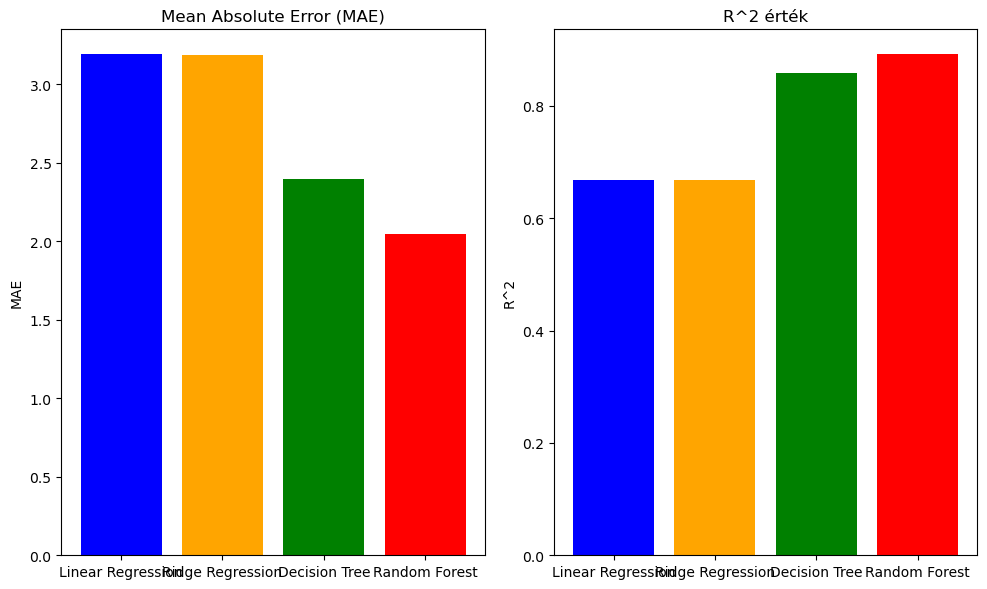

In [ ]:
# Modellek teljesítményének összehasonlítása
modellek = ['Linear Regression', 'Ridge Regression', 'Decision Tree', 'Random Forest']
mae_values = [mae, mae_ridge, mae_fa, mae_rf]
r2_values = [r2, r2_ridge, r2_fa, r2_rf]

plt.figure(figsize=(10, 6))

# MAE ábra
plt.subplot(1, 2, 1)
plt.bar(modellek, mae_values, color=['blue', 'orange', 'green', 'red'])
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')

# R^2 ábra
plt.subplot(1, 2, 2)
plt.bar(modellek, r2_values, color=['blue', 'orange', 'green', 'red'])
plt.title('R^2 érték')
plt.ylabel('R^2')

plt.tight_layout()
plt.show()


In [30]:
# Modell mentése
joblib.dump(rf_modell, 'random_forest_model.pkl')

betoltott_modell = joblib.load('random_forest_model.pkl')

uj_adatok = [[0.00632, 18.00, 2.310, 0.5380, 6.5750, 65.20, 4.0900, 1.0000, 296.0, 15.30, 396.90, 4.98, 24.00]]  # példaként egy adatpont
uj_elojelezes = betoltott_modell.predict(uj_adatok)
print(f"Új adat előrejelzése: {uj_elojelezes}")


Új adat előrejelzése: [27.557]


Hyperparaméter-keresés: optimalizálja a modell teljesítményét a legjobb paraméter megtalálásával

In [31]:
param_grid = {
    'n_estimators': [50, 100, 200],  # A fák számának próbálgatása
    'max_depth': [10, 20, 30, None],  # A fák maximális mélységének próbálgatása
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Legjobb paraméterek: {grid_search.best_params_}")
print(f"Legjobb MAE érték: {-grid_search.best_score_}")


Legjobb paraméterek: {'max_depth': 30, 'n_estimators': 200}
Legjobb MAE érték: 2.402282577160494


In [32]:
param_distributions = {
    'n_estimators': [50, 100, 200, 500],  # Fák száma
    'max_depth': [10, 20, 30, None],  # Fák mélysége
    'min_samples_split': [2, 5, 10],  # A csomópontok felosztásához szükséges minimális minták
    'min_samples_leaf': [1, 2, 4],  # A levelekben minimum minták
}

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, n_iter=100, cv=5, 
                                   scoring='neg_mean_absolute_error', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

print(f"Legjobb paraméterek: {random_search.best_params_}")
print(f"Legjobb MAE érték: {-random_search.best_score_}")


Legjobb paraméterek: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Legjobb MAE érték: 2.3984245617283966


In [33]:
uj_adatok = [[0.0312, 0.00, 7.87, 0.4200, 7.8520, 90.00, 4.1000, 1.0000, 280.0, 15.50, 376.10, 5.20, 25.00]]

# Előrejelzés a legjobb modellel 
elojelezes = random_search.best_estimator_.predict(uj_adatok)
print(f"Új adat előrejelzése: {elojelezes}")


Új adat előrejelzése: [26.0544]


In [34]:
#crossvalidation
cv_scores = cross_val_score(random_search.best_estimator_, prediktorok_normalizalt, cel, cv=5, scoring='neg_mean_absolute_error')

print(f"Cross-validation MAE értékek: {-cv_scores}")
print(f"Átlagos MAE: {-cv_scores.mean()}")


Cross-validation MAE értékek: [2.11530392 2.56106535 3.38673465 3.78522178 3.17309703]
Átlagos MAE: 3.0042845466899655


In [35]:
uj_adatok = [[0.2, 0.3, 3.0, 0, 0.4, 6.5, 30, 5.0, 3, 300, 10, 0.2, 5]]  # Csak példa
uj_adatok_normalizalt = normalizalo.transform(uj_adatok)

uj_ar = modell.predict(uj_adatok_normalizalt)
print(f'Az ingatlan előrejelzett ára: {uj_ar[0]}')


Az ingatlan előrejelzett ára: 30.79577690493338


e:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


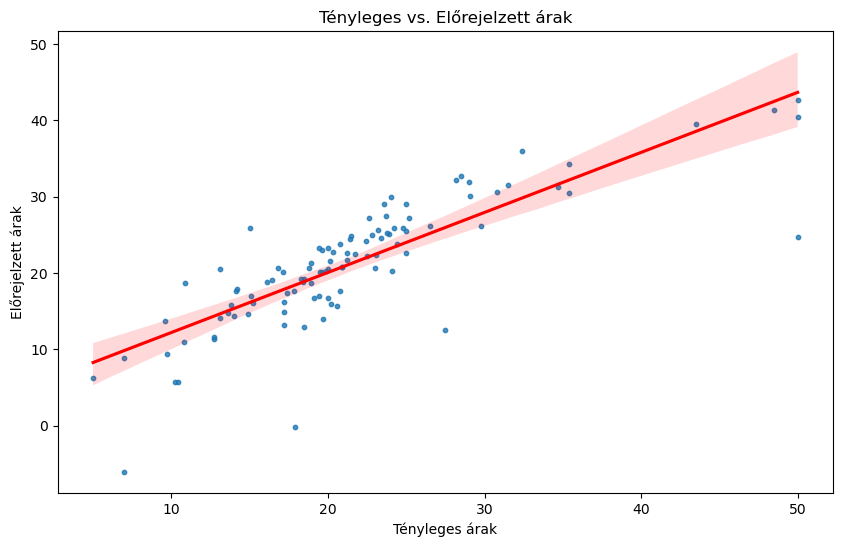

In [36]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.xlabel('Tényleges árak')
plt.ylabel('Előrejelzett árak')
plt.title('Tényleges vs. Előrejelzett árak')
plt.show()


In [37]:
def ar_becsles(adat_tomb, model, scaler):

    adat_tomb = np.array(adat_tomb).reshape(1, -1)

    adat_tomb_normalizalt = scaler.transform(adat_tomb)

    becsult_ar = model.predict(adat_tomb_normalizalt)
    
    return becsult_ar[0] 

In [38]:
# példa
ingatlan_adatok = [0.1, 18.0, 2.31, 0, 0.538, 6.575, 65.2, 4.09, 1, 296.0, 15.3, 396.9, 4.98]

#linear: modell
#ridge: ridge_modell
#döntési fa: fa_modell
#random forest: rf_modell

becsult_ar = ar_becsles(ingatlan_adatok, rf_modell, normalizalo)

print(f"Az ingatlan becsült ára: {becsult_ar:.2f} ezer dollár")

Az ingatlan becsült ára: 28.82 ezer dollár


e:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [39]:


joblib.dump(random_search.best_estimator_, 'modell.pkl')  
joblib.dump(normalizalo, 'scaler.pkl')  

modell = joblib.load('modell.pkl')  
normalizalo = joblib.load('scaler.pkl')  

fields = [
    ('CRIM', 'Bűnözési arány (CRIM):'), 
    ('ZN', 'Lakóövezeti terület aránya (ZN):'),
    ('INDUS', 'Nem lakóövezeti terület aránya (INDUS):'),
    ('CHAS', 'Közelség a Charles folyóhoz (CHAS, 0 vagy 1):'),
    ('NOX', 'Nitrogén-oxid szint (NOX):'),
    ('RM', 'Szobák száma (átlag, RM):'),
    ('AGE', 'Az épületek kora (AGE):'),
    ('DIS', 'Távolság a központoktól (DIS):'),
    ('RAD', 'Elérhetőség index (RAD):'),
    ('TAX', 'Ingatlanadó mértéke (TAX):'),
    ('PTRATIO', 'Diák/tanár arány (PTRATIO):'),
    ('B', 'Afroamerikai arány (B):'),
    ('LSTAT', 'Alacsony státuszú lakosok aránya (LSTAT):')
]

input_widgets = {}
for key, description in fields:
    input_widgets[key] = widgets.FloatText(description=description, value=0.0)
    
button = widgets.Button(description="Előrejelzés futtatása")
output = widgets.Output()

def futtat_elorejelzes(b):
    with output:
        output.clear_output()  
        
        bemeneti_adatok = [input_widgets[key].value for key, _ in fields]
        bemeneti_adatok = np.array(bemeneti_adatok).reshape(1, -1)
        
        bemeneti_normalizalt = normalizalo.transform(bemeneti_adatok)
        
        becsult_ar = modell.predict(bemeneti_normalizalt)[0]
        print(f"A becsült ingatlanár: {becsult_ar:.2f} ezer dollár")

button.on_click(futtat_elorejelzes)

display(widgets.VBox(list(input_widgets.values()) + [button, output]))
